# Лабораторная работа №2 #
# Вариант №12 #
# Выполнила: Корячихина А.С. #


In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [360]:
titanic = pd.read_csv(r'titanic3.csv', sep=';')
titanic


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48,0.0,0.0,19952,"26,5500",E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63,1.0,0.0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39,0.0,0.0,112050,"0,0000",A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2.0,0.0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71,0.0,0.0,PC 17609,"49,5042",NaN,C,NaN,22.0,"Montevideo, Uruguay"


## Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


<table>
   <tr>
    <th>Признак</th>
    <th>Описание</th>
    <th>Тип значения</th>
   </tr>
<tr><td>pclass</td><td>класс билета</td><td>1 - 1 класс; 2 - 2 класс; 3 - 3 класс</td></tr>
<tr><td>survived</td><td>выжил ли пассажир</td><td>0 - Нет ;1 - Да</td></tr>
<tr><td>name</td><td>имя</td><td>Строка</td></tr>
<tr><td>sex</td><td>пол</td><td>female - женский, male - мужской</td></tr>
<tr><td>age</td><td>возраст</td><td>числовой</td></tr>
<tr><td>sibsp</td><td>число братьев, сестер, супругов на борту</td><td>числовой</td></tr>
<tr><td>parch</td><td>число родителей, детей на ботру</td><td>числовой</td></tr>
<tr><td>fare</td><td>цена билета</td><td>числовой</td></tr>
<tr><td>ticket</td><td>номер билета</td><td>строка</td></tr>
<tr><td>cabin</td><td>номер каюты</td><td>строка</td></tr>
<tr><td>embarked</td><td>порт погрузки</td><td>	C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>
<tr><td>boat</td><td>номер спасательной шлюпки</td><td>строка</td></tr>
<tr><td>body</td><td>идентификационный номер тела</td><td>числовой</td></tr>
<tr><td>home.dest</td>	<td>Дом/Назначение</td>	<td>строка</td></tr>
</table>


## Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [361]:
titanic.shape


(1310, 14)

In [362]:
titanic = titanic.drop_duplicates()
titanic.shape

#В данных нет дубликатов

(1310, 14)

## Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

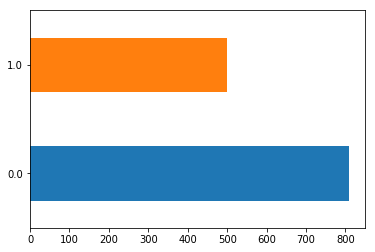

In [363]:
titanic["survived"].value_counts().plot.barh();

Данные не сбалансированные => Используем ROC кривую, т.к. она дает адекватную оценку качества работы алгоритма, где классы несбалансированны не существенно

##	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

numerical:  ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']
categorial:  ['sex', 'embarked']


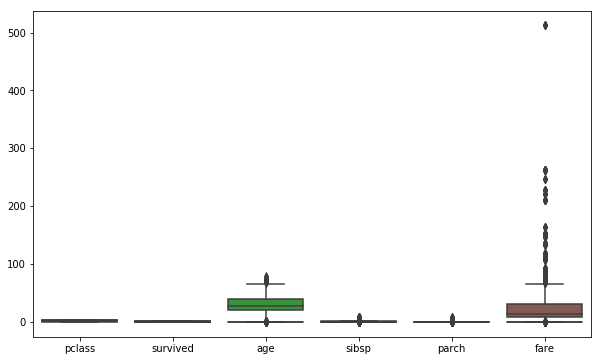

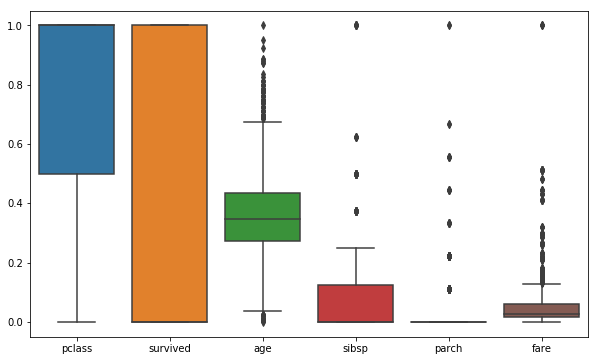

In [364]:
list_to_drop = ['body', 'boat', 'name', 'cabin', 'ticket', 'home.dest']
titanic.drop(list_to_drop, axis=1, inplace=True)

#Т.к. в данных количественные признаки указаны с запятой, необходимо привести их к нужному формату (39,3 -> 39.3) 
def fix(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj
    
#Редактируем количественные признаки   
titanic['age'] = titanic['age'].apply(lambda x: fix(x))
titanic['fare'] = titanic['fare'].apply(lambda x: fix(x))
titanic['pclass'] = titanic['pclass'].apply(lambda x: fix(x))

#Создаем список количественных и категориальный признаков
numerical = [i for i in titanic.columns if titanic[i].dtype.name != 'object']
categorial = [i for i in titanic.columns if titanic[i].dtype.name == 'object']

print('numerical: ', numerical)
print('categorial: ', categorial)

plt.figure(figsize=(10,6))
sns.boxplot(data=titanic[numerical])

#Заполняем пропуски средними значениями
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic = titanic.dropna().reset_index(drop=True)

#Нормализуем данные
scaler = preprocessing.MinMaxScaler()
titanic[numerical] = scaler.fit_transform(titanic[numerical].values.astype(float))
sns.boxplot(data=titanic[numerical])

plt.figure(figsize=(10,6))
sns.boxplot(data=titanic[numerical])


## Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [365]:
#Бинарные признаки заменяем на 0 и 1. Объяснение: так было в лекциях (:3)
#Для этого найдем бинарные признаки...
binary = [i for i in categorial if len(titanic[i].unique()) == 2]
nonbinary = [i for i in categorial if len(titanic[i].unique()) > 2]

#...и заменим их

for col in binary:
    for i, unic_item in enumerate(titanic[col].unique()):
        titanic[col] = titanic[col].replace(to_replace=[unic_item], value=[i])

# для не бинарых применим dummy-кодирование
titanic_nonbinary = pd.get_dummies(titanic[nonbinary])
titanic.drop(nonbinary, axis=1, inplace=True)
titanic = pd.concat([titanic_nonbinary, titanic], axis=1) 
                     
titanic.head()



,embarked_C,embarked_Q,embarked_S,pclass,survived,sex,age,sibsp,parch,fare
0,0,0,1,0.0,1.0,0,0.361169,0.000,0.000000,0.412503
1,0,0,1,0.0,1.0,1,0.009395,0.125,0.222222,0.295806
2,0,0,1,0.0,0.0,0,0.022964,0.125,0.222222,0.295806
3,0,0,1,0.0,0.0,1,0.373695,0.125,0.222222,0.295806
4,0,0,1,0.0,0.0,0,0.311064,0.125,0.222222,0.295806


## 	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

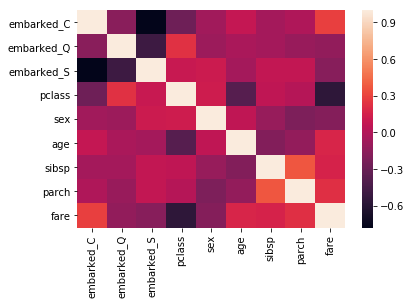

In [366]:
df_corr = titanic.drop('survived', axis=1).corr()
sns.heatmap(df_corr)
plt.show()

## Заполните пропущенные значения в данных;

In [367]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 10 columns):
embarked_C    1306 non-null uint8
embarked_Q    1306 non-null uint8
embarked_S    1306 non-null uint8
pclass        1306 non-null float64
survived      1306 non-null float64
sex           1306 non-null int64
age           1306 non-null float64
sibsp         1306 non-null float64
parch         1306 non-null float64
fare          1306 non-null float64
dtypes: float64(6), int64(1), uint8(3)
memory usage: 75.3 KB


## 	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [368]:
# классификатор K-ближайших соседей

# разделим полученные данные на данные для обучения и теста
X, y = titanic.drop('survived', axis=1), titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)




In [369]:
# найдем оптимальный радиус для классификатора ближайших соседей
rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(0, 5, 0.05)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_

print('best train score:', best_score, '\t at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
rnc.fit(X_train, y_train)
Y_score = rnc.predict(X_test)
best_score  = np.mean(y_test  == Y_score)
print('test score: ', best_score)

best train score: 0.7899343544857768 	 at radius: 0.65
test score:  0.793367346939


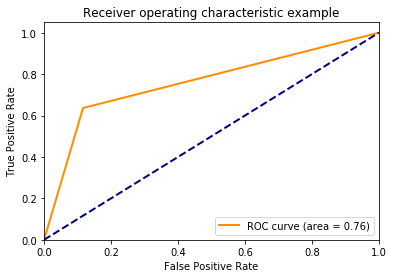

In [370]:
fpr, tpr, _ = roc_curve(y_test, Y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.62')

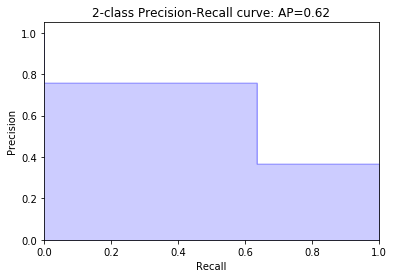

In [371]:
average_precision = average_precision_score(y_test, Y_score)
precision, recall, _ = precision_recall_curve(y_test, Y_score)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [372]:
#найдем оптимальные глубину и количества учитываемых параметров для классификатора решающее дерево
dtc = DecisionTreeClassifier()

parameters  = {'max_depth': list(range(1, 5)),'max_leaf_nodes': list(range(2, 32)),'min_samples_leaf': list(range(1, 10))}

dtc_search = GridSearchCV(DecisionTreeClassifier(), parameters , n_jobs=-1)
dtc_search.fit(X_train, y_train)

best_features = dtc_search.best_estimator_.max_features
best_depth = dtc_search.best_estimator_.max_depth
best_score = dtc_search.best_score_

Y_score = dtc_search.best_estimator_.predict(X_test)

print("Test score: {:.3f}".format(dtc_search.score(X_test, y_test)))
print('test score: ', best_score)

Test score: 0.814
test score:  0.7975929978118161


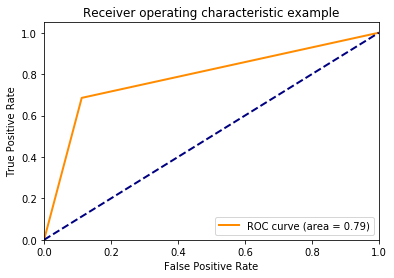

In [373]:
fpr, tpr, _ = roc_curve(y_test, Y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

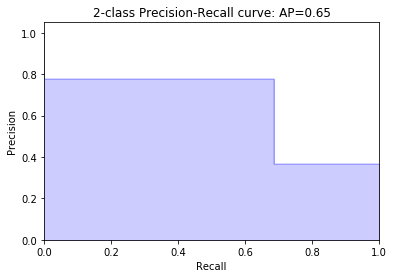

In [374]:
average_precision = average_precision_score(y_test, Y_score)
precision, recall, _ = precision_recall_curve(y_test, Y_score)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

## 	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Классификаторы персептрон и k ближайших соседей(по радиусу) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. 